# UNData API Exercise - Mike Phillips

## Import Libraries

In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## README

In this exercise, you'll redo the data gathering phase of the UNData Exploration project by using APIs instead of downloading csv files.

You'll make use of the World Bank Indicators API <https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation>. Note that this API does not require an API key. Before attempting the exercise, it would be a good idea to skim through the Documentation page and to check out the Basic Call Structure article <https://datahelpdesk.worldbank.org/knowledgebase/articles/898581>.

1. Use the API to get all available data for the GDP per capita, PPP (constant 2017 international $) indicator. Hint: this indicator has code "NY.GDP.PCAP.PP.KD". Adjust the query parameters so that you can retrieve all available rows. Convert the results to a DataFrame.

2. Now, use the API to get all available data for Life expectancy at birth, total (years). This indicator has code "SP.DYN.LE00.IN". Again, convert the results to a DataFrame.

3. Merge the two results DataFrames together. You may want to rename or drop columns prior to merging.

4. You can also get more information about the available countries (region, capital city, income level classification, etc.) by using the Country API <https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries>. Use this API to pull in all available data. Merge this with your other datasets. Use this to now remove the rows that correspond to regions and not countries.

**Bonus Questions:** After doing a basic request to get all records, you can attempt these exercises to get additional practice using query parameters.

1. Adjust your request so that it returns data just for the United States.

2. Adjust your request so that it returns data just for the United States for the year 2021.

3. Adjust your request so that it returns data just for the United States for the years 2000 through 2021.

4. Adjust your request so that it returns data for the United States and Canada for the years 2000 through 2021.

5. If you haven't already done so and you would like to get some additional practice using loops, use the page parameter in order to pull all records. Do not change the value of the per_page parameter. You will likely need to utilize a loop of some kind in order to pull all records.

6. The endpoint "http://api.worldbank.org/v2/indicator" will return information about all available indicators. See Indicator API Queries <https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries>. Use this endpoint to find the code for the "Public Expenditure on Education (% GDP)" indicator.

## EDA

### GDP XML

### Life Expectancy XML

## ANSWERS

### 1. Use the API to get all available data for the GDP per capita, PPP (constant 2017 international $) indicator. Hint: this indicator has code "NY.GDP.PCAP.PP.KD". Adjust the query parameters so that you can retrieve all available rows. Convert the results to a DataFrame.

In [68]:
gdp_per_capita_indicator = "NY.GDP.PCAP.PP.KD"
gdp_url = f"https://api.worldbank.org/v2/country/all/indicator/{gdp_per_capita_indicator}"
gdp_params = {"format": "json",
              "per_page": 25000 # checking above the total 17,290
}
gdp_response = requests.get(gdp_url, params = gdp_params)
# gdp_response.text
gdp_json = gdp_response.json()
gdp_json

[{'page': 1,
  'pages': 1,
  'per_page': 25000,
  'total': 17290,
  'sourceid': '2',
  'lastupdated': '2025-10-07'},
 [{'indicator': {'id': 'NY.GDP.PCAP.PP.KD',
    'value': 'GDP per capita, PPP (constant 2021 international $)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2024',
   'value': 3968.96375122681,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.PCAP.PP.KD',
    'value': 'GDP per capita, PPP (constant 2021 international $)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2023',
   'value': 3948.14272105098,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.PCAP.PP.KD',
    'value': 'GDP per capita, PPP (constant 2021 international $)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2022',
   'value': 3974.24421369721

In [69]:
type(gdp_json)

list

In [70]:
len(gdp_json)

2

In [71]:
gdp_keys = gdp_json[0]
gdp_keys

{'page': 1,
 'pages': 1,
 'per_page': 25000,
 'total': 17290,
 'sourceid': '2',
 'lastupdated': '2025-10-07'}

In [72]:
gdp_rows = gdp_json[1]
# gdp_rows
len(gdp_rows)

17290

In [73]:
gdp_rows[0]

{'indicator': {'id': 'NY.GDP.PCAP.PP.KD',
  'value': 'GDP per capita, PPP (constant 2021 international $)'},
 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
 'countryiso3code': 'AFE',
 'date': '2024',
 'value': 3968.96375122681,
 'unit': '',
 'obs_status': '',
 'decimal': 0}

In [74]:
gdp_df = pd.DataFrame(gdp_rows)
gdp_df.head(10)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2024,3968.963751,,,0
1,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,3948.142721,,,0
2,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,3974.244214,,,0
3,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,3933.580905,,,0
4,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,3861.068816,,,0
5,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,4073.653989,,,0
6,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,4088.402831,,,0
7,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2017,4085.466233,,,0
8,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2016,4074.187591,,,0
9,"{'id': 'NY.GDP.PCAP.PP.KD', 'value': 'GDP per ...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2015,4075.159661,,,0


In [80]:
gdp_df_normalized = pd.json_normalize(gdp_rows, sep = '_')

In [81]:
gdp_df_normalized

,countryiso3code,date,value,unit,obs_status,decimal,indicator_id,indicator_value,country_id,country_value
0,AFE,2024,3968.963751,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZH,Africa Eastern and Southern
1,AFE,2023,3948.142721,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZH,Africa Eastern and Southern
2,AFE,2022,3974.244214,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZH,Africa Eastern and Southern
3,AFE,2021,3933.580905,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZH,Africa Eastern and Southern
4,AFE,2020,3861.068816,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...,...,...
17285,ZWE,1964,NaN,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZW,Zimbabwe
17286,ZWE,1963,NaN,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZW,Zimbabwe
17287,ZWE,1962,NaN,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZW,Zimbabwe
17288,ZWE,1961,NaN,,,0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",ZW,Zimbabwe


In [87]:
gdp_df_normalized['indicator_value'].loc[0]

'GDP per capita, PPP (constant 2021 international $)'

### 2. Now, use the API to get all available data for Life expectancy at birth, total (years). This indicator has code "SP.DYN.LE00.IN". Again, convert the results to a DataFrame.

In [82]:
life_expectancy_indicator = "SP.DYN.LE00.IN"
life_url = f"https://api.worldbank.org/v2/country/all/indicator/{life_expectancy_indicator}"
life_params = {"format": "json",
              "per_page": 25000 # checking above the total 17,290
}
life_response = requests.get(life_url, params = life_params)
# life_response.text
life_json = life_response.json()
# life_json
# type(life_json)
# len(life_json)
life_keys = life_json[0]
# life_keys
life_rows = life_json[1]
# life_rows
# len(life_rows)
# life_rows[0]
life_df = pd.DataFrame(life_rows)
# life_df.head(10)
life_df_normalized = pd.json_normalize(life_rows, sep = '_')
life_df_normalized

,countryiso3code,date,value,unit,obs_status,decimal,indicator_id,indicator_value,country_id,country_value
0,AFE,2024,NaN,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZH,Africa Eastern and Southern
1,AFE,2023,65.146291,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZH,Africa Eastern and Southern
2,AFE,2022,64.487020,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZH,Africa Eastern and Southern
3,AFE,2021,62.979999,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZH,Africa Eastern and Southern
4,AFE,2020,63.766484,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...,...,...
17285,ZWE,1964,55.431000,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZW,Zimbabwe
17286,ZWE,1963,54.942000,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZW,Zimbabwe
17287,ZWE,1962,54.453000,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZW,Zimbabwe
17288,ZWE,1961,53.966000,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZW,Zimbabwe


### 3. Merge the two results DataFrames together. You may want to rename or drop columns prior to merging.

#### GDP Clean and Rename

In [109]:
gdp_clean = gdp_df_normalized[["countryiso3code", "date", "value", "country_id", "country_value"]]
gdp_clean

,countryiso3code,date,value,country_id,country_value
0,AFE,2024,3968.963751,ZH,Africa Eastern and Southern
1,AFE,2023,3948.142721,ZH,Africa Eastern and Southern
2,AFE,2022,3974.244214,ZH,Africa Eastern and Southern
3,AFE,2021,3933.580905,ZH,Africa Eastern and Southern
4,AFE,2020,3861.068816,ZH,Africa Eastern and Southern
...,...,...,...,...,...
17285,ZWE,1964,NaN,ZW,Zimbabwe
17286,ZWE,1963,NaN,ZW,Zimbabwe
17287,ZWE,1962,NaN,ZW,Zimbabwe
17288,ZWE,1961,NaN,ZW,Zimbabwe


In [110]:
gdp_rename = gdp_clean.rename(
    columns = {
    "countryiso3code": "ISO3",
    "date": "Year",
    "value": "GDP per capita, PPP (constant 2021 international $)",
    "country_id": "Country ID",
    "country_value": "Country"
    }
)
gdp_rename

,ISO3,Year,"GDP per capita, PPP (constant 2021 international $)",Country ID,Country
0,AFE,2024,3968.963751,ZH,Africa Eastern and Southern
1,AFE,2023,3948.142721,ZH,Africa Eastern and Southern
2,AFE,2022,3974.244214,ZH,Africa Eastern and Southern
3,AFE,2021,3933.580905,ZH,Africa Eastern and Southern
4,AFE,2020,3861.068816,ZH,Africa Eastern and Southern
...,...,...,...,...,...
17285,ZWE,1964,NaN,ZW,Zimbabwe
17286,ZWE,1963,NaN,ZW,Zimbabwe
17287,ZWE,1962,NaN,ZW,Zimbabwe
17288,ZWE,1961,NaN,ZW,Zimbabwe


In [111]:
gdp_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ISO3                                                 17290 non-null  object 
 1   Year                                                 17290 non-null  object 
 2   GDP per capita, PPP (constant 2021 international $)  8461 non-null   float64
 3   Country ID                                           17290 non-null  object 
 4   Country                                              17290 non-null  object 
dtypes: float64(1), object(4)
memory usage: 675.5+ KB


In [112]:
gdp_rename["Year"] = gdp_rename["Year"].astype(int)

In [113]:
gdp_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ISO3                                                 17290 non-null  object 
 1   Year                                                 17290 non-null  int64  
 2   GDP per capita, PPP (constant 2021 international $)  8461 non-null   float64
 3   Country ID                                           17290 non-null  object 
 4   Country                                              17290 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 675.5+ KB


#### Life Expectancy Clean and Rename

In [114]:
life_clean = life_df_normalized[["countryiso3code", "date", "value", "country_id", "country_value"]]
life_rename = life_clean.rename(
    columns = {
    "countryiso3code": "ISO3",
    "date": "Year",
    "value": "Life expectancy at birth, total (years)",
    "country_id": "Country ID",
    "country_value": "Country"
    }
)
life_rename["Year"] = life_rename["Year"].astype(int)
life_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ISO3                                     17290 non-null  object 
 1   Year                                     17290 non-null  int64  
 2   Life expectancy at birth, total (years)  16926 non-null  float64
 3   Country ID                               17290 non-null  object 
 4   Country                                  17290 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 675.5+ KB


#### Merge

In [115]:
gdp_vs_life_expectancy = (
    gdp_rename.merge(
        life_rename[["ISO3", "Year", "Country ID", "Life expectancy at birth, total (years)"]],
        on=["ISO3", "Year", "Country ID"],
        how="outer"))

gdp_vs_life_expectancy

,ISO3,Year,"GDP per capita, PPP (constant 2021 international $)",Country ID,Country,"Life expectancy at birth, total (years)"
0,,1960,NaN,XD,High income,68.336473
1,,1960,NaN,XM,Low income,41.618660
2,,1960,NaN,XN,Lower middle income,45.830188
3,,1960,NaN,XT,Upper middle income,41.963012
4,,1960,NaN,XY,Not classified,NaN
...,...,...,...,...,...,...
17285,ZWE,2020,2987.268413,ZW,Zimbabwe,61.530000
17286,ZWE,2021,3184.784602,ZW,Zimbabwe,60.135000
17287,ZWE,2022,3323.118318,ZW,Zimbabwe,62.360000
17288,ZWE,2023,3442.248887,ZW,Zimbabwe,62.775000


In [105]:
gdp_vs_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ISO3                                                 17290 non-null  object 
 1   Year                                                 17290 non-null  int64  
 2   GDP per capita, PPP (constant 2021 international $)  8461 non-null   float64
 3   Country ID                                           17290 non-null  object 
 4   Country                                              17290 non-null  object 
 5   Life expectancy at birth, total (years)              16926 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 810.6+ KB


In [106]:
gdp_vs_life_expectancy.describe()

,Year,"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)"
count,17290.000000,8461.000000,16926.000000
mean,1992.000000,20436.138693,64.735089
std,18.762206,22715.627486,11.080180
min,1960.000000,510.822823,10.989000
25%,1976.000000,4322.222821,57.661500
50%,1992.000000,11949.659486,67.091500
75%,2008.000000,28938.098022,72.914677
max,2024.000000,174339.002047,86.372000


### 4. You can also get more information about the available countries (region, capital city, income level classification, etc.) by using the Country API <https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries>. Use this API to pull in all available data. Merge this with your other datasets. Use this to now remove the rows that correspond to regions and not countries.

In [185]:
country_url = f"https://api.worldbank.org/v2/country"
country_params = {"format": "json",
              "per_page": 400 # checking above the total 296
}
country_response = requests.get(country_url, params = country_params)
# country_response.text
country_json = country_response.json()
# country_json
# type(country_json)
# len(country_json)
country_keys = country_json[0]
# country_keys
country_rows = country_json[1]
# country_rows
# len(country_rows)
# country_rows[0]
country_df = pd.DataFrame(country_rows)
# country_df.head(10)
country_df_normalized = pd.json_normalize(country_rows, sep = '_')
country_df_normalized.head(5)

,id,iso2Code,name,capitalCity,longitude,latitude,region_id,region_iso2code,region_value,adminregion_id,adminregion_iso2code,adminregion_value,incomeLevel_id,incomeLevel_iso2code,incomeLevel_value,lendingType_id,lendingType_iso2code,lendingType_value
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,LCN,ZJ,Latin America & Caribbean,,,,HIC,XD,High income,LNX,XX,Not classified
1,AFE,ZH,Africa Eastern and Southern,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
2,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,MEA,ZQ,"Middle East, North Africa, Afghanistan & Pakistan",MNA,XQ,"Middle East, North Africa, Afghanistan & Pakis...",LIC,XM,Low income,IDX,XI,IDA
3,AFR,A9,Africa,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
4,AFW,ZI,Africa Western and Central,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates


In [186]:
country_clean = country_df_normalized[[
    "id",
    "name",
    "capitalCity",
    "longitude",
    "latitude",
    "region_value",
    "incomeLevel_value",
    "lendingType_value"
]]
country_rename = country_clean.rename(
    columns = {
    "id": "ISO3",
    "name": "Country",
    "capitalCity": "Capital City",
    "region_value": "Region",
    "incomeLevel_value": "Income Level", 
    "lendingType_value": "Lending Type"
    }
)
country_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ISO3          296 non-null    object
 1   Country       296 non-null    object
 2   Capital City  296 non-null    object
 3   longitude     296 non-null    object
 4   latitude      296 non-null    object
 5   Region        296 non-null    object
 6   Income Level  296 non-null    object
 7   Lending Type  296 non-null    object
dtypes: object(8)
memory usage: 18.6+ KB


In [187]:
country_rename

,ISO3,Country,Capital City,longitude,latitude,Region,Income Level,Lending Type
0,ABW,Aruba,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
1,AFE,Africa Eastern and Southern,,,,Aggregates,Aggregates,Aggregates
2,AFG,Afghanistan,Kabul,69.1761,34.5228,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
3,AFR,Africa,,,,Aggregates,Aggregates,Aggregates
4,AFW,Africa Western and Central,,,,Aggregates,Aggregates,Aggregates
...,...,...,...,...,...,...,...,...
291,XZN,Sub-Saharan Africa excluding South Africa and ...,,,,Aggregates,Aggregates,Aggregates
292,YEM,"Yemen, Rep.",Sana'a,44.2075,15.352,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
293,ZAF,South Africa,Pretoria,28.1871,-25.746,Sub-Saharan Africa,Upper middle income,IBRD
294,ZMB,Zambia,Lusaka,28.2937,-15.3982,Sub-Saharan Africa,Lower middle income,IDA


In [188]:
all_data = (
    gdp_vs_life_expectancy.merge(
        country_rename,
        on=["ISO3", "Country"],
        how="left"))
all_data

,ISO3,Year,"GDP per capita, PPP (constant 2021 international $)",Country ID,Country,"Life expectancy at birth, total (years)",Capital City,longitude,latitude,Region,Income Level,Lending Type
0,,1960,NaN,XD,High income,68.336473,NaN,NaN,NaN,NaN,NaN,NaN
1,,1960,NaN,XM,Low income,41.618660,NaN,NaN,NaN,NaN,NaN,NaN
2,,1960,NaN,XN,Lower middle income,45.830188,NaN,NaN,NaN,NaN,NaN,NaN
3,,1960,NaN,XT,Upper middle income,41.963012,NaN,NaN,NaN,NaN,NaN,NaN
4,,1960,NaN,XY,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17285,ZWE,2020,2987.268413,ZW,Zimbabwe,61.530000,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17286,ZWE,2021,3184.784602,ZW,Zimbabwe,60.135000,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17287,ZWE,2022,3323.118318,ZW,Zimbabwe,62.360000,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17288,ZWE,2023,3442.248887,ZW,Zimbabwe,62.775000,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend


In [189]:
countries_only = all_data[
    (all_data["Region"] != "Aggregates") &
    (all_data["ISO3"].notna()) & # still have blanks in ISO3 up to here - need to strip?
    (all_data["ISO3"] != "NA") &
    (all_data["ISO3"].astype(str).str.strip() != "") # strip
]

In [190]:
countries_only

,ISO3,Year,"GDP per capita, PPP (constant 2021 international $)",Country ID,Country,"Life expectancy at birth, total (years)",Capital City,longitude,latitude,Region,Income Level,Lending Type
325,ABW,1960,NaN,AW,Aruba,64.049,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
326,ABW,1961,NaN,AW,Aruba,64.215,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
327,ABW,1962,NaN,AW,Aruba,64.602,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
328,ABW,1963,NaN,AW,Aruba,64.944,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
329,ABW,1964,NaN,AW,Aruba,65.303,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
...,...,...,...,...,...,...,...,...,...,...,...,...
17285,ZWE,2020,2987.268413,ZW,Zimbabwe,61.530,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17286,ZWE,2021,3184.784602,ZW,Zimbabwe,60.135,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17287,ZWE,2022,3323.118318,ZW,Zimbabwe,62.360,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
17288,ZWE,2023,3442.248887,ZW,Zimbabwe,62.775,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend


In [191]:
countries_only["ISO3"].value_counts()

ISO3
ABW    65
AFG    65
AGO    65
ALB    65
AND    65
       ..
XKX    65
YEM    65
ZAF    65
ZMB    65
ZWE    65
Name: count, Length: 219, dtype: int64

In [192]:
countries_only["ISO3"].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN',
       'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LIE', 'LKA', 'LSO', 'LTU',
       'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL',

In [193]:
countries_only["Country"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Faroe Islands', 'Micronesia, Fed

In [194]:
countries_only.describe()

,Year,"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)"
count,14235.000000,6851.000000,13982.000000
mean,1992.000000,21695.960139,65.170534
std,18.762322,24017.254410,11.247922
min,1960.000000,510.822823,10.989000
25%,1976.000000,4309.672562,58.341250
50%,1992.000000,12621.995045,67.818500
75%,2008.000000,31695.050060,73.372500
max,2024.000000,174339.002047,86.372000


In [197]:
countries_only = countries_only.reset_index(drop=True)
countries_only.to_csv("countries_only.csv")

In [198]:
countries_only

,ISO3,Year,"GDP per capita, PPP (constant 2021 international $)",Country ID,Country,"Life expectancy at birth, total (years)",Capital City,longitude,latitude,Region,Income Level,Lending Type
0,ABW,1960,NaN,AW,Aruba,64.049,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
1,ABW,1961,NaN,AW,Aruba,64.215,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
2,ABW,1962,NaN,AW,Aruba,64.602,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
3,ABW,1963,NaN,AW,Aruba,64.944,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
4,ABW,1964,NaN,AW,Aruba,65.303,Oranjestad,-70.0167,12.5167,Latin America & Caribbean,High income,Not classified
...,...,...,...,...,...,...,...,...,...,...,...,...
14230,ZWE,2020,2987.268413,ZW,Zimbabwe,61.530,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
14231,ZWE,2021,3184.784602,ZW,Zimbabwe,60.135,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
14232,ZWE,2022,3323.118318,ZW,Zimbabwe,62.360,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend
14233,ZWE,2023,3442.248887,ZW,Zimbabwe,62.775,Harare,31.0672,-17.8312,Sub-Saharan Africa,Lower middle income,Blend


# API Exercise

An Application Programming Interface, or API, is a structured way to retrieve data from a website. Using an API is safer and easier than something like webscraping, since what you get back is already in a usable format. Many organizations use APIs like:
- Government organizations ([US Government](https://www.data.gov/developers/apis))
- Large companies ([Twitter API](https://developer.twitter.com/en/docs))
- News organizations ([NYT API](https://developer.nytimes.com/))
- And [many more](https://github.com/public-apis/public-apis)

If you type `how to use an api in python` in google, you get back many articles walking through how to use an API. It is a well documented and useful tool to be familiar with.

## Basic API Usage

Let's start by using the Numbers API, an API which provides interesting facts about numbers.

With any API, you should start by inspecting the documentation. For the Numbers API, the documentation is located here: http://numbersapi.com

We will be using the `requests` package to make a `GET` request to an API. Similar to webscraping, APIs require an endpoint to tell python where to send the request.

When using an API, the first thing we need to know is the expected URL structure. In this case, it is http://numbersapi.com/number/type where number is the number for which we want an interesting fact and type indicates which type of fact we want. Note that type can be omitted, and it will default to trivia.

In [2]:
endpoint = 'http://numbersapi.com/8'

response = requests.get(endpoint)

ConnectTimeout: HTTPConnectionPool(host='numbersapi.com', port=80): Max retries exceeded with url: /8 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x000002801FDE8590>, 'Connection to numbersapi.com timed out. (connect timeout=None)'))

Let's check the response. If all is well, we should have a 200 response.

In [3]:
response

<Response [200]>

To access the content of the response, we can look at the `text` attribute.

In [4]:
response.text

'8 is the number of principles of Yong in Chinese calligraphy.'

What if we want to be able to easily change the number that we want to retrieve. For this, we can make use of an f-string. 

In [5]:
name = 'Barry'

sentence = f'Hello, {name}, how are you?'
sentence

'Hello, Barry, how are you?'

In [6]:
number = 19

endpoint = f'http://numbersapi.com/{number}'

response = requests.get(endpoint)

response.text

'19 is the final year a person is a teenager.'

This API also allows for batch requests: http://numbersapi.com#batching

In [7]:
number_range = "1..10"

endpoint = f'http://numbersapi.com/{number_range}'

response = requests.get(endpoint)

We can look at the response as text.

In [8]:
response.text

'{\n "1": "1 is the loneliest number.",\n "2": "2 is the first magic number in physics.",\n "3": "3 is the number of consecutive successful attempts in a hat trick in sports.",\n "4": "4 is the number of chambers the mammalian heart consists of.",\n "5": "5 is the number of babies born in a quintuplet.",\n "6": "6 is the standard length (year) of a term in office for a United States senator.",\n "7": "7 is the figurative number of seas.",\n "8": "8 is the number of furlongs in a mile.",\n "9": "9 is the number of circles of Hell in Dante\'s Divine Comedy.",\n "10": "10 is the number of letters used in the traditional Snellen chart."\n}'

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [9]:
res = response.json()
res

{'1': '1 is the loneliest number.',
 '2': '2 is the first magic number in physics.',
 '3': '3 is the number of consecutive successful attempts in a hat trick in sports.',
 '4': '4 is the number of chambers the mammalian heart consists of.',
 '5': '5 is the number of babies born in a quintuplet.',
 '6': '6 is the standard length (year) of a term in office for a United States senator.',
 '7': '7 is the figurative number of seas.',
 '8': '8 is the number of furlongs in a mile.',
 '9': "9 is the number of circles of Hell in Dante's Divine Comedy.",
 '10': '10 is the number of letters used in the traditional Snellen chart.'}

Then, we can access the individual entries by passing in the correct key.

In [10]:
res['5']

'5 is the number of babies born in a quintuplet.'

Finally, notice that we can ask for a fact about a random number.

In [11]:
endpoint = 'http://numbersapi.com/random'

response = requests.get(endpoint)

response.text

'366 is the number of days in a leap year.'

We can specify a minimum and maximum for these random numbers: http://numbersapi.com#min-and-max

#### Parameters

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

1. Make an empty dictionary for the `params` variable
2. Look at the documentation to know what parameters you should include, add these as **keys** to the dictionary
3. Add the appropriate values for each parameter as the **values** for the dictionary

For example, let's get a fact about a random number between 500 and 600

In [12]:
endpoint = 'http://numbersapi.com/random'

params = {
    'min': 500,
    'max': 600
}

response = requests.get(endpoint, params = params)

response.text

'500 is the winning permillage (tenth of a percent) of a sports team with equal numbers of wins and losses.'

## NASA API and API Keys

Now, let's work with the NASA API: https://api.nasa.gov/

One of the main ways APIs maintain security is by the use of some form of authentication, such as an API key. An API key can be obtained in a number of ways, depending on the API, and is a way for the application to know who you are and provides you secure access to the data.

To work with the NASA API, you'll need to create an API key.

1. Scroll down and enter your First Name, Last Name, and email to generate an API key
2. Copy the API key into the keys.json file.

**DO NOT SHARE YOUR API KEYS OR PUT THEM IN A PUBLIC PLACE LIKE GITHUB**

API keys should be stored securely on your computer and removed from any code or documents you share.

Now, we can safely load your key into a variable using the json library.

import json

with open('keys.json') as fi:
    credentials = json.load(fi)

In [3]:

api_key = '4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'



1. Look at the different available APIs in the `Browse APIs` tab
2. Click on the **Asteroids - NeoWs**
3. Under **Neo - Feed**, copy the second line into the endpoint variable below as a string and delete the last `?`

In [4]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/feed?'


Fill in the parameters dictionary below to retrieve information on all NeoWs between January 1, 2022 and January 7, 2022. (Be sure the include your api key as a parameter).

In [5]:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-07&api_key=DEMO_KEY
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-07&api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP
params = {
    'api_key' : api_key,
    'start_date': '2022-01-01',
    'end_date': '2022-01-07'
}

You now have all the pieces to make an API request

In [6]:
response = requests.get(endpoint, params = params)

See what was saved to `response`

In [7]:
response

<Response [200]>

This API returns the results as a json, so we'll access them using the `json` method.

In [8]:
res = response.json()
res

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-07&end_date=2022-01-13&detailed=false&api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-26&end_date=2022-01-01&detailed=false&api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-07&detailed=false&api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
 'element_count': 115,
 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
    'id': '2494697',
    'neo_reference_id': '2494697',
    'name': '494697 (2004 SW55)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
    'absolute_magnitude_h': 20.77,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
      'estimated_diameter_max': 0.41690776},
  

In [9]:
res.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

The information that we're interested in is located under `near_earth_objects`.

In [10]:
res['near_earth_objects']

{'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
   'id': '2494697',
   'neo_reference_id': '2494697',
   'name': '494697 (2004 SW55)',
   'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
   'absolute_magnitude_h': 20.77,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
     'estimated_diameter_max': 0.41690776},
    'meters': {'estimated_diameter_min': 186.44681832,
     'estimated_diameter_max': 416.9077599521},
    'miles': {'estimated_diameter_min': 0.1158526459,
     'estimated_diameter_max': 0.2590543917},
    'feet': {'estimated_diameter_min': 611.7021794171,
     'estimated_diameter_max': 1367.8076551614}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2022-01-07',
     'close_approach_date_full': '2022-Jan-07 12:09',
     'epoch_date_close_approach': 1641557340000,
     'relative_

In [11]:
res['near_earth_objects'].keys()

dict_keys(['2022-01-07', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-01', '2022-01-02'])

**Question:** How many near earth objects were there on January 3?

In [12]:
res['near_earth_objects']['2022-01-03']

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3313974?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
  'id': '3313974',
  'neo_reference_id': '3313974',
  'name': '(2006 BV39)',
  'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3313974',
  'absolute_magnitude_h': 29.1,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0040230458,
    'estimated_diameter_max': 0.0089958039},
   'meters': {'estimated_diameter_min': 4.0230457983,
    'estimated_diameter_max': 8.9958038817},
   'miles': {'estimated_diameter_min': 0.002499804,
    'estimated_diameter_max': 0.0055897317},
   'feet': {'estimated_diameter_min': 13.198969577,
    'estimated_diameter_max': 29.5137932072}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2022-01-03',
    'close_approach_date_full': '2022-Jan-03 18:46',
    'epoch_date_close_approach': 1641235560000,
    'relative_velocity': {'kilometers_per_second': '22.7391

In [13]:
len(res['near_earth_objects']['2022-01-03'])

16

**Question:** Is the first returned result for January 3 potentially hazardous (as indicated by the `is_potentially_hazardous_asteroid` field)?

In [14]:
res['near_earth_objects']['2022-01-03'][0]

{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3313974?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
 'id': '3313974',
 'neo_reference_id': '3313974',
 'name': '(2006 BV39)',
 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3313974',
 'absolute_magnitude_h': 29.1,
 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0040230458,
   'estimated_diameter_max': 0.0089958039},
  'meters': {'estimated_diameter_min': 4.0230457983,
   'estimated_diameter_max': 8.9958038817},
  'miles': {'estimated_diameter_min': 0.002499804,
   'estimated_diameter_max': 0.0055897317},
  'feet': {'estimated_diameter_min': 13.198969577,
   'estimated_diameter_max': 29.5137932072}},
 'is_potentially_hazardous_asteroid': False,
 'close_approach_data': [{'close_approach_date': '2022-01-03',
   'close_approach_date_full': '2022-Jan-03 18:46',
   'epoch_date_close_approach': 1641235560000,
   'relative_velocity': {'kilometers_per_second': '22.7391653876',
    'kilom

In [15]:
res['near_earth_objects']['2022-01-03'][0]['is_potentially_hazardous_asteroid']

False

**Question:** What was the relative velocity, in miles per hour of the first object returned for January 3?

In [16]:
res['near_earth_objects']['2022-01-03'][0]['close_approach_data'][0]['relative_velocity']['miles_per_hour']

'50865.239055435'

In [17]:
res['near_earth_objects']['2022-01-03'][0]['close_approach_data'][0]['relative_velocity']['miles_per_hour']

'50865.239055435'

The for loop below iterates over the data returned and pulls out information for each asteroid. It then saves the information to lists, that are used for making a scatter plot of the asteroids.

In [18]:
res['near_earth_objects']

{'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
   'id': '2494697',
   'neo_reference_id': '2494697',
   'name': '494697 (2004 SW55)',
   'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
   'absolute_magnitude_h': 20.77,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
     'estimated_diameter_max': 0.41690776},
    'meters': {'estimated_diameter_min': 186.44681832,
     'estimated_diameter_max': 416.9077599521},
    'miles': {'estimated_diameter_min': 0.1158526459,
     'estimated_diameter_max': 0.2590543917},
    'feet': {'estimated_diameter_min': 611.7021794171,
     'estimated_diameter_max': 1367.8076551614}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2022-01-07',
     'close_approach_date_full': '2022-Jan-07 12:09',
     'epoch_date_close_approach': 1641557340000,
     'relative_

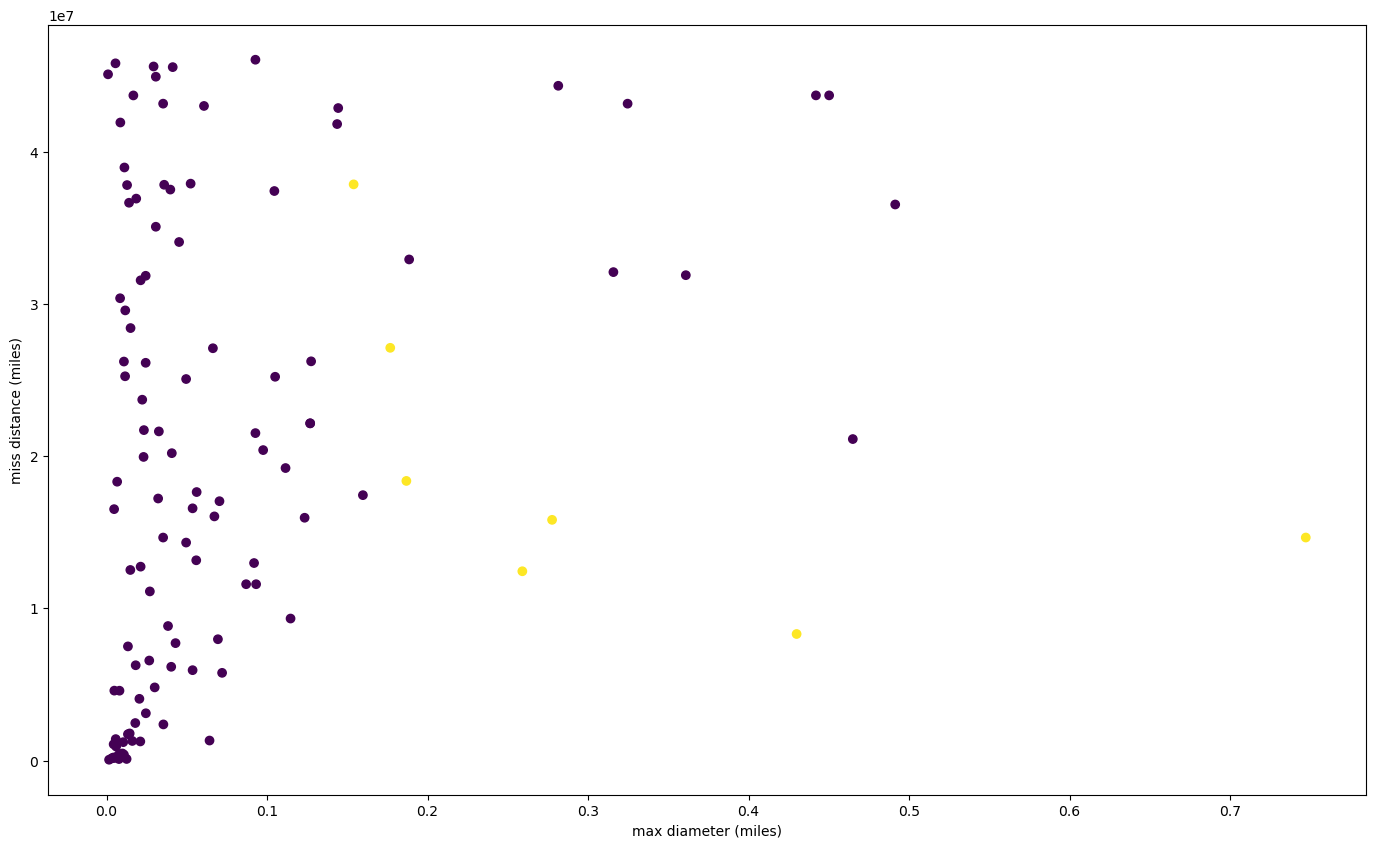

In [19]:
# List we are looking to build
max_diam = []
hazardous = []
miss_dist = []

#for loop of our dictionary
for day, objs in res['near_earth_objects'].items():
    #loop for list of objects near earth
    for obj in objs:
        max_diam.append(float(obj['estimated_diameter']['miles']['estimated_diameter_max']))
        hazardous.append(obj['is_potentially_hazardous_asteroid'])
        miss_dist.append(float(obj['close_approach_data'][0]['miss_distance']['miles']))

#build a scatter plot
plt.figure(figsize = (17, 10))
plt.scatter(max_diam, miss_dist, c = hazardous)
plt.xlabel('max diameter (miles)')
plt.ylabel('miss distance (miles)');

If you want to work with the response from an API using _pandas_, you'll want to convert it to a DataFrame. In some circumstances, you can easily convert a json to a DataFrame, but in other cases, you have to do a little bit of work.

In [20]:
import pandas as pd

The easiest case is when you have a list of dictionaries. Here, you can simply use the `DataFrame` constructor. Let's see how this works using one of the days. If you wanted to get all of the results into a single DataFrame, you could iterate through and concatenate. 

In [21]:
res = response.json() #if this is true

response.json()['near_earth_objects']['2022-01-07']  # same as 

res['near_earth_objects']['2022-01-07'] #this


[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=4atiKdblVebqYXEp9A6gXMi7Fg8dHsAAAQu7VUoP'},
  'id': '2494697',
  'neo_reference_id': '2494697',
  'name': '494697 (2004 SW55)',
  'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
  'absolute_magnitude_h': 20.77,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
    'estimated_diameter_max': 0.41690776},
   'meters': {'estimated_diameter_min': 186.44681832,
    'estimated_diameter_max': 416.9077599521},
   'miles': {'estimated_diameter_min': 0.1158526459,
    'estimated_diameter_max': 0.2590543917},
   'feet': {'estimated_diameter_min': 611.7021794171,
    'estimated_diameter_max': 1367.8076551614}},
  'is_potentially_hazardous_asteroid': True,
  'close_approach_data': [{'close_approach_date': '2022-01-07',
    'close_approach_date_full': '2022-Jan-07 12:09',
    'epoch_date_close_approach': 1641557340000,
    'relative_velocity': {'kilometers_per_secon

In [22]:
pd.DataFrame(response.json()['near_earth_objects']['2022-01-07']).head(2)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,sentry_data
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,{'kilometers': {'estimated_diameter_min': 0.18...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,NaN
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,{'kilometers': {'estimated_diameter_min': 0.30...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,NaN


You'll notice that we still have dictionaries in some of the columns. This can be remedied using the `json_normalize` function.

In [23]:
pd.json_normalize(response.json()['near_earth_objects']['2022-01-07']).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max,sentry_data
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655,NaN
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676,NaN


This almost does it, but the `close_approach_data` column contains a list, which `json_normalize` can't handle. To fix this, we can use the `explode` method which will unpack the list across multiple columns, if needed.

In [24]:
response_df = pd.json_normalize(response.json()['near_earth_objects']['2022-01-07'])
response_df.explode('close_approach_data').head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max,sentry_data
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655,NaN
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676,NaN


Once exploded, you can use the `json_normalize` function again.

In [25]:
#first we explode
exploded_data = response_df.explode('close_approach_data')
#then we normalize
pd.json_normalize(exploded_data['close_approach_data']).head(2)

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2022-01-07,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2022-01-07,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


In [26]:
explode_and_normalize = pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
explode_and_normalize.shape

(20, 11)

And finally, you can concatenate the two pieces together.

In [27]:
final = pd.concat([
    response_df.explode('close_approach_data').drop(columns = ['close_approach_data']),
    pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
], axis = 1)
final.head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,...,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,...,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,...,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


Let's try another `endpoint` from NASA. This time copy the endpoint from the **APOD** (Astronomy Picture of the Day) section.

Fill in the endpoint and parameters in order to retrieve the image for January 1, 2019.

In [28]:
endpoint = 'https://api.nasa.gov/planetary/apod'

params = {
    'date' : '2019-01-01',
    'api_key': api_key
}

In [29]:
response = requests.get(endpoint, params = params)

In [30]:
response

<Response [200]>

In [31]:
response.json()

{'date': '2019-01-01',
 'explanation': "This floating ring is the size of a galaxy.  In fact, it is a galaxy -- or at least part of one: the photogenic Sombrero Galaxy, one of the largest galaxies in the nearby Virgo Cluster of Galaxies.  The dark band of dust that obscures the mid-section of the Sombrero Galaxy in optical light actually glows brightly in infrared light.  The featured image, digitally sharpened, shows the infrared glow, recently recorded by the orbiting Spitzer Space Telescope, superposed in false-color on an existing image taken by NASA's Hubble Space Telescope in optical light. The Sombrero Galaxy, also known as M104, spans about 50,000 light years across and lies 28 million light years away.  M104 can be seen with a small telescope in the direction of the constellation Virgo.   News: New Horizons Spacecraft Passes Ultima Thule",
 'hdurl': 'https://apod.nasa.gov/apod/image/1901/sombrero_spitzer_3000.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'T

Finally, let's grab the image url so that we can retrieve the actual image.

In [32]:
image_response = requests.get(response.json()['url'])

For image responses, we don't want to look at the text or json, but instead take the content. We'll now use the `.content` attribute from the response to render an image.

In [33]:
from IPython.display import Image

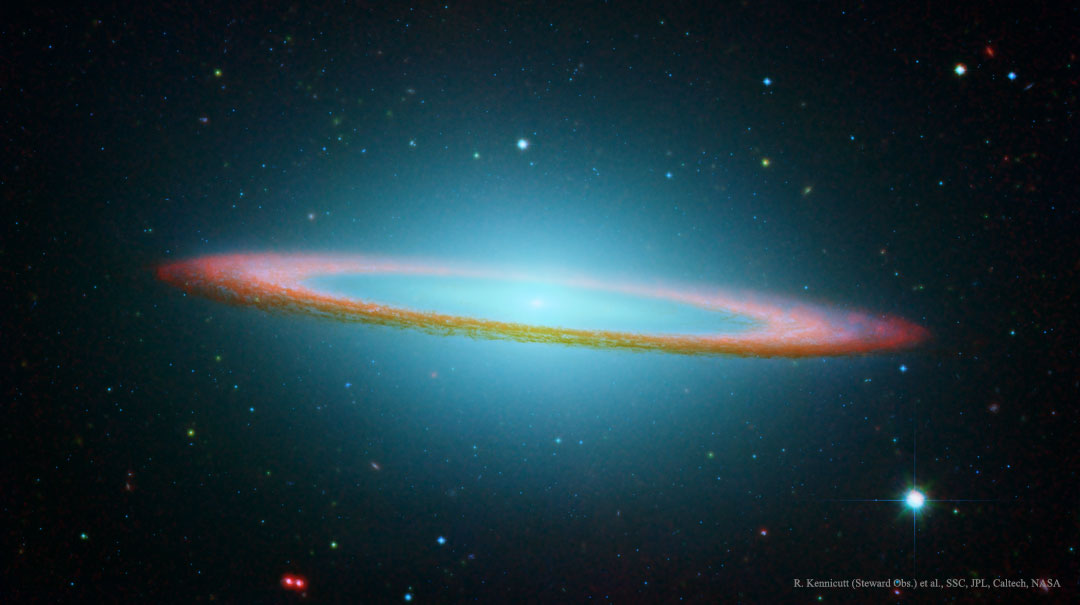

In [34]:
Image(image_response.content)